# Predicting Credit Card Defaults 

In [129]:
# Importing Libraraies

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
from math import sqrt

# estimators
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn.feature_selection import RFE
from sklearn.preprocessing import OneHotEncoder

# model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

# cross validation
from sklearn.model_selection import train_test_split

from astropy.table import Table, Column

In [22]:
# Importing data
credit = pd.read_csv('default of credit card clients.csv', header =1)

In [23]:
# Checking data
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [24]:
# Column names
credit.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [25]:
# Understand the makeup of the data
credit.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [26]:
# Checking the data types of each variable
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

## Pre-processing

### 1) Checking for missing data

In [27]:
credit.isnull().head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [28]:
credit.isnull().sum()
print('There are no missing values in:'  'credit card dataset')

There are no missing values in:credit card dataset


###  Renaming Variables 

In [29]:
# Renaming 'default payment next month' and Pay_0 columns
credit.rename(columns = {'default payment next month':'Class'}, inplace = True) # renaming dependent variable
credit.rename(columns={"PAY_0": "PAY_1"}, inplace = True) # renaming Pay_0 to Pay_1

In [30]:
# Column names - Confirming renamng of columns
credit.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Class'],
      dtype='object')

###  Removing ID column

In [31]:
# Dropping ID column
credit.drop('ID', axis = 1, inplace =True) 
credit.columns # Confirming removal of ID column

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Class'],
      dtype='object')

###  Grouping Eduction Categories

In [32]:
# Checking Education variable unique levels
credit['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [33]:
# Grouping "others" and "unindentified" levels 
credit['EDUCATION']=np.where(credit['EDUCATION'] == 5, 4, credit['EDUCATION'])
credit['EDUCATION']=np.where(credit['EDUCATION'] == 6, 4, credit['EDUCATION'])
credit['EDUCATION']=np.where(credit['EDUCATION'] == 0, 4, credit['EDUCATION'])

In [34]:
# Confirming grouping 
credit['EDUCATION'].unique()

array([2, 1, 3, 4], dtype=int64)

## Exploratory Data Analysis (EDA)

### 1) Credit limit distribution

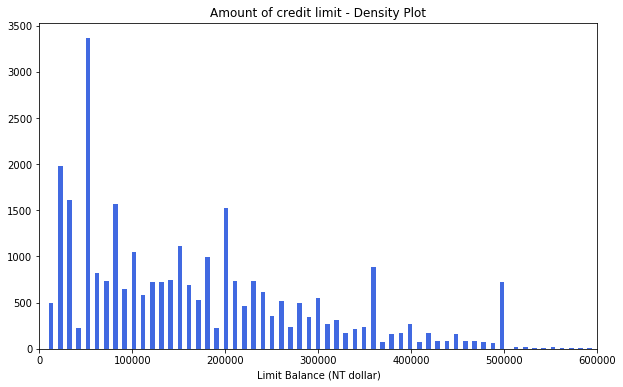

In [35]:
# Frequencey distribution of amount of credit limit
plt.figure(figsize = (10,6))
plt.title('Amount of credit limit - Density Plot')
plt.xlim([0,600000])
plt.xlabel('Limit Balance (NT dollar)')
plt.hist(credit['LIMIT_BAL'], bins=200, color=['royalblue'])
plt.show()

**$50000 is the credit limit common for larget number of people.**

C:\Users\shant\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


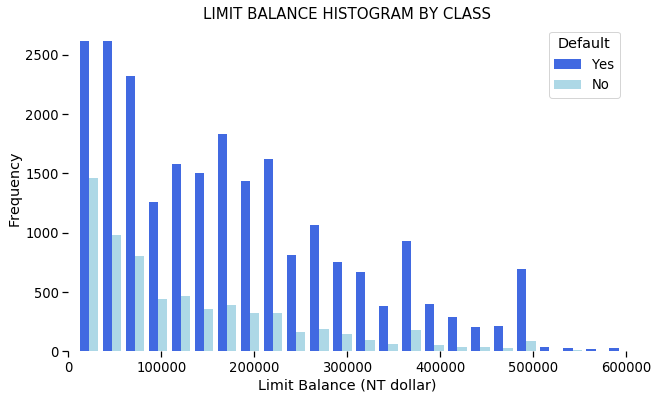

In [36]:
#Frequencey distribution of amount of credit limit based on "Class"

class0 = list(credit[credit['Class'] == 0]['LIMIT_BAL'])
class1 = list(credit[credit['Class'] == 1]['LIMIT_BAL'])

plt.figure(figsize=(10,6))
sns.set_context('notebook', font_scale=1.2)
plt.hist([class0, class1], bins = 40, normed=False, color=['royalblue', 'lightblue'])
plt.xlim([0,600000])
plt.legend(['Yes', 'No'], title = 'Default', loc='upper right', facecolor='white')
plt.xlabel('Limit Balance (NT dollar)')
plt.ylabel('Frequency')
plt.title('LIMIT BALANCE HISTOGRAM BY CLASS', SIZE=15)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent=True)

**Overall most credit card defaults are by clients with credit limit balance upto $100,000.**

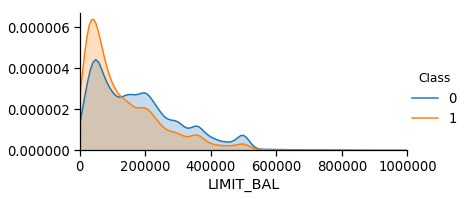

In [37]:
# Credit limit balance distribution based on Class 
fig = sns.FacetGrid(credit, hue='Class', aspect = 2)
fig.map(sns.kdeplot, 'LIMIT_BAL', shade=True)
oldest = credit['LIMIT_BAL'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()
plt.show()

**Potential defaulters show higher frequency of lower limit of amount of credit limit.**

### 2) Frequency distribution of Age

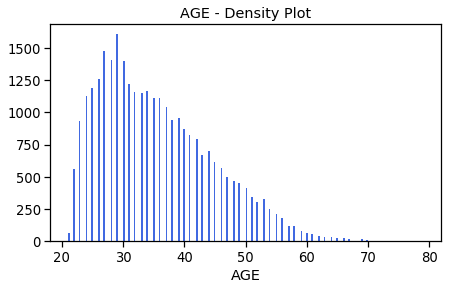

In [38]:
# Frequency distribution of age whole dataset
plt.figure(figsize = (7,4))
plt.title('AGE - Density Plot')
plt.xlabel('AGE')
plt.hist(credit['AGE'], bins=200, color=['royalblue'])
plt.show()

**Higher density of people found in age group 25 to 40. With highest density around 30 years old.**

C:\Users\shant\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


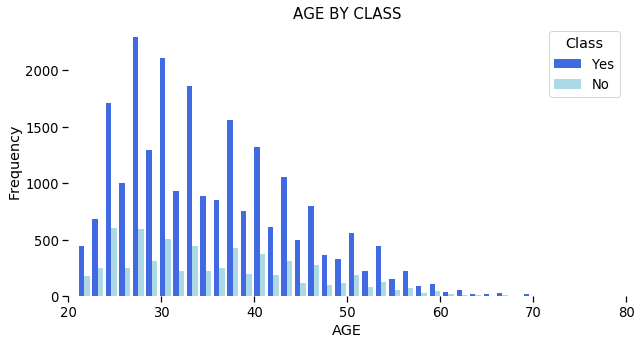

In [39]:
# Frequency distribution of age by "Class"

class0 = list(credit[credit['Class'] == 0]['AGE'])
class1 = list(credit[credit['Class'] == 1]['AGE'])

plt.figure(figsize=(10,5))
sns.set_context('notebook', font_scale=1.2)
plt.hist([class0, class1], bins = 40, normed=False, color=['royalblue', 'lightblue'])
plt.xlim([20,80])
plt.legend(['Yes', 'No'], title = 'Class', loc='upper right', facecolor='white')
plt.xlabel('AGE')
plt.ylabel('Frequency')
plt.title('AGE BY CLASS', SIZE=15)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent=True);

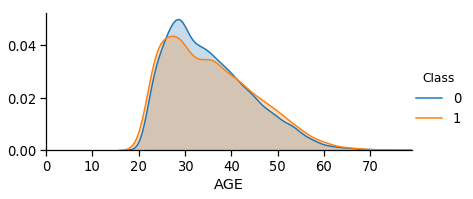

In [40]:
# Age distribution based on Class 
fig = sns.FacetGrid(credit, hue='Class', aspect = 2)
fig.map(sns.kdeplot, 'AGE', shade=True)
oldest = credit['AGE'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()
plt.show()

**Higher proportion of non - defaulters in 25 to 40 years of age group.** 

### 3) Distribution of default credit card clients 

In [41]:
# Getting count of defaulters vs. non-defaulters
credit['Class'].value_counts()

0    23364
1     6636
Name: Class, dtype: int64

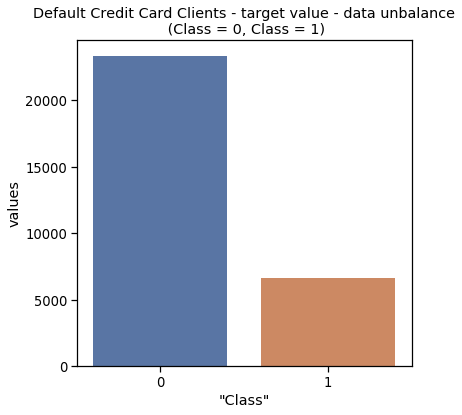

In [42]:
# Class 0 (non defaulters) vs. Class 1 (defaulters)
default = credit["Class"].value_counts()
df = (pd.DataFrame({'"Class"': default.index,'values': default.values}))
plt.figure(figsize = (6,6))
plt.title('Default Credit Card Clients - target value - data unbalance\n (Class = 0, Class = 1)')
sns.set_color_codes("pastel")
sns.barplot(x = '"Class"', y="values", data=df , palette="deep")
locs, labels = plt.xticks()
plt.show()

**6636 people out of 30000 people will default next month.**

### 4) Gender

In [43]:
# Male vs. female counts
credit['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

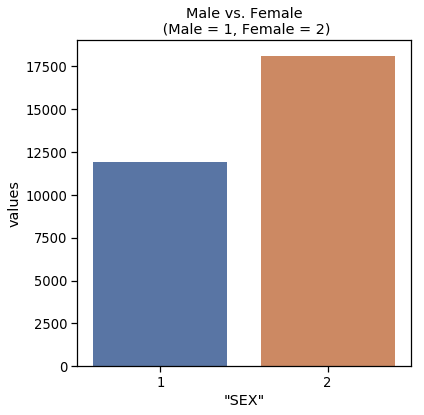

In [44]:
# Male vs. female count 
temp = credit["SEX"].value_counts()
df = (pd.DataFrame({'"SEX"': temp.index,'values': temp.values}))
plt.figure(figsize = (6,6))
plt.title('Male vs. Female\n (Male = 1, Female = 2)')
sns.set_color_codes("pastel")
sns.barplot(x = '"SEX"', y="values", data=df, palette="deep")
locs, labels = plt.xticks()
plt.show()

**Higher proportion of female as compared to males.**

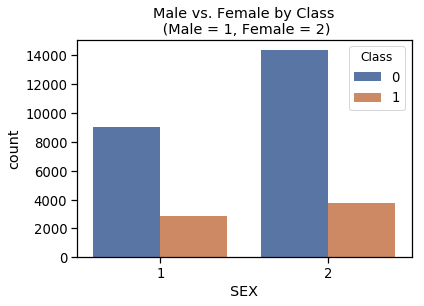

In [45]:
# Male vs. Female distribution based on "Class 0 vs 1"
sns.countplot(x='SEX', data=credit, hue="Class" , palette="deep")
plt.title('Male vs. Female by Class\n (Male = 1, Female = 2)')
plt.show()

**In both classes (non defaulters and defaulters) proportion of females is more than males.**

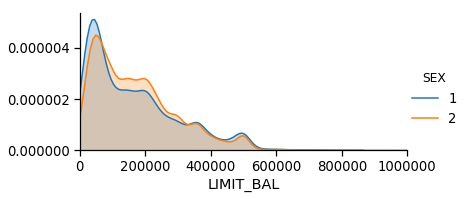

In [46]:
# Balance limit based on Gender
fig = sns.FacetGrid(credit, hue='SEX', aspect = 2)
fig.map(sns.kdeplot, 'LIMIT_BAL', shade = True)
oldest = credit['LIMIT_BAL'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()
plt.show()

**Higher proportion of males with lower credit limit balance.**

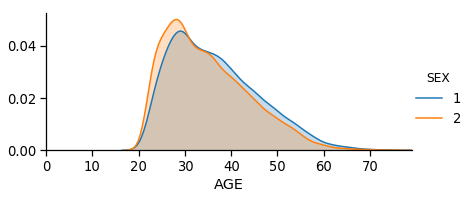

In [47]:
# Age distribution based on Gender 
fig = sns.FacetGrid(credit, hue='SEX', aspect = 2)
fig.map(sns.kdeplot, 'AGE', shade=True)
oldest = credit['AGE'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()
plt.show()

**Higher proportion of females in age range 20 to 40.**

### 5) Education 

In [48]:
# Total count in each eduacation level
credit['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

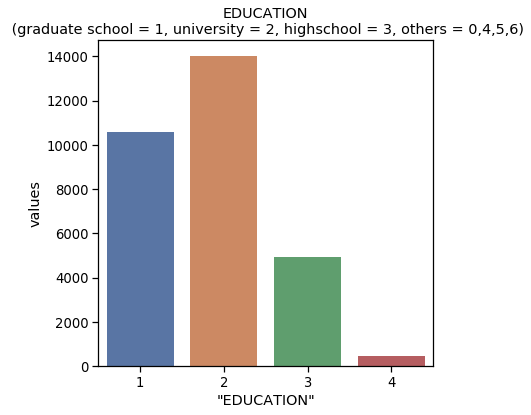

In [49]:
# Distribution of people by education level
temp = credit["EDUCATION"].value_counts()
df = (pd.DataFrame({'"EDUCATION"': temp.index,'values': temp.values}))
plt.figure(figsize = (6,6))
plt.title('EDUCATION\n (graduate school = 1, university = 2, highschool = 3, others = 0,4,5,6)')
sns.set_color_codes("pastel")
sns.barplot(x = '"EDUCATION"', y="values", data=df , palette="deep")
locs, labels = plt.xticks()
plt.show()

**Highest proportion of people with university and graduate school education**

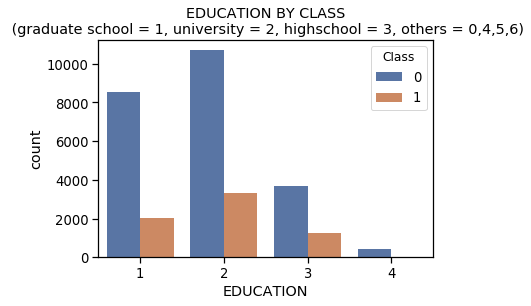

In [50]:
# Distribution of people by education level based on "Class 0 vs. 1"
sns.countplot(x='EDUCATION', data=credit, hue="Class" , palette="deep")
plt.title('EDUCATION BY CLASS\n (graduate school = 1, university = 2, highschool = 3, others = 0,4,5,6)')
plt.show()

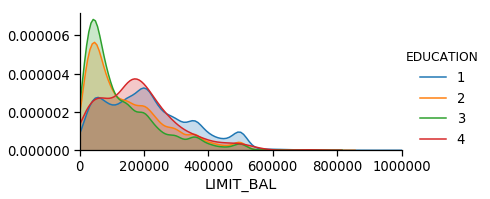

In [51]:
# Balance limit based on Education Level
fig = sns.FacetGrid(credit, hue='EDUCATION', aspect = 2)
fig.map(sns.kdeplot, 'LIMIT_BAL', shade = True)
oldest = credit['LIMIT_BAL'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()
plt.show()

**Higher proportion of non-defaulters and defaulters with university and graduate level education.**

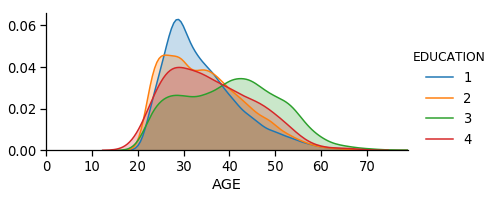

In [52]:
# Age distribution based on Education
fig = sns.FacetGrid(credit, hue='EDUCATION', aspect = 2)
fig.map(sns.kdeplot, 'AGE', shade=True)
oldest = credit['AGE'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()
plt.show()

**Higher proportion of people with graduate and university level in age group 20 to 40. While high school and other levels show lower proportion.**

### 6) Marital Status

In [53]:
# Total count in each marital status
credit['MARRIAGE'].value_counts(dropna=False)

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

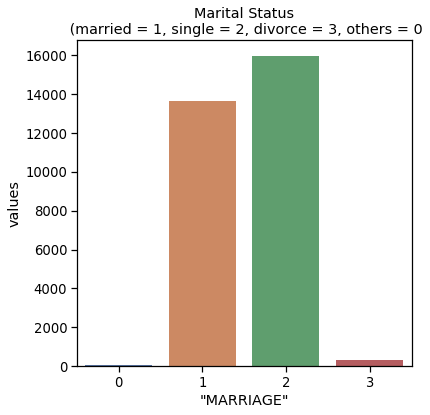

In [54]:
# Distribution of people by marital status level
temp = credit["MARRIAGE"].value_counts()
df = (pd.DataFrame({'"MARRIAGE"': temp.index,'values': temp.values}))
plt.figure(figsize = (6,6))
plt.title('Marital Status\n (married = 1, single = 2, divorce = 3, others = 0')
sns.set_color_codes("pastel")
sns.barplot(x = '"MARRIAGE"', y="values", data=df , palette="deep")
locs, labels = plt.xticks()
plt.show()

**Higher proportion of people either married or single. Futher proportion of singles is more than married**

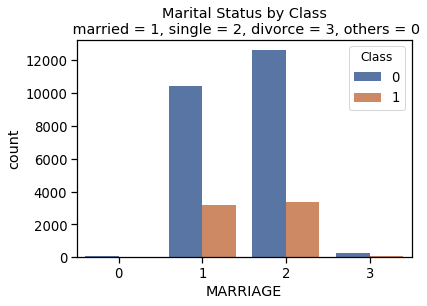

In [55]:
# Distribution of people by marital status level based on "Class 0 vs. 1"
sns.countplot(x='MARRIAGE', data=credit, hue="Class" , palette="deep" )
plt.title('Marital Status by Class\n married = 1, single = 2, divorce = 3, others = 0')
plt.show()

**For non-defaulters - singles and married in higher proportion. But in case of defaulters both singles and married show almost similar proportion.**

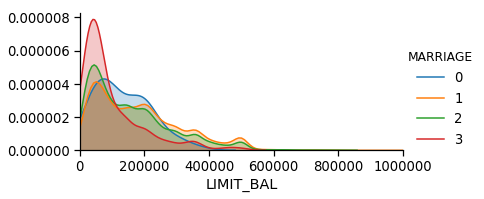

In [56]:
# Balance limit based on Marital Status
fig = sns.FacetGrid(credit, hue='MARRIAGE', aspect = 2)
fig.map(sns.kdeplot, 'LIMIT_BAL', shade = True)
oldest = credit['LIMIT_BAL'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()
plt.show()

**Higher proportion of people with divorced marital status show lower credit limit. While other statues show similar proportion.**

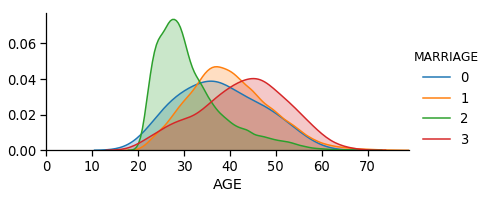

In [57]:
# Age distribution based on Marital Status 
fig = sns.FacetGrid(credit, hue = 'MARRIAGE', aspect = 2)
fig.map(sns.kdeplot, 'AGE', shade = True)
oldest = credit['AGE'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()
plt.show()

**Highest proportion of singles in age group 20 to 40.**

### Summary of Payment History

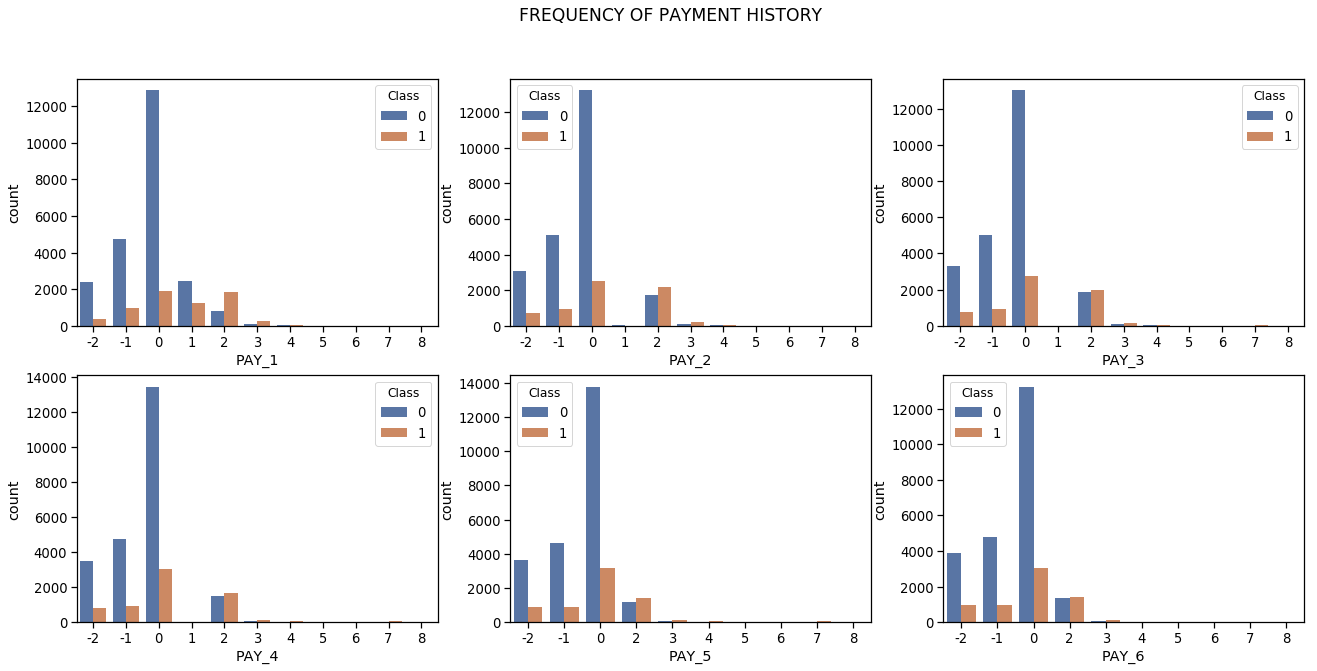

In [58]:
# Creating a new dataframe with categorical variables
subset1 = credit[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 
               'PAY_5', 'PAY_6', 'Class']]

f, axes = plt.subplots(2, 3, figsize=(22, 10), facecolor='white')
f.suptitle('FREQUENCY OF PAYMENT HISTORY')
ax1 = sns.countplot(x="PAY_1", hue="Class", data=subset1, palette="deep", ax=axes[0,0])
ax2 = sns.countplot(x="PAY_2", hue="Class", data=subset1, palette="deep", ax=axes[0,1])
ax3 = sns.countplot(x="PAY_3", hue="Class", data=subset1, palette="deep", ax=axes[0,2])
ax4 = sns.countplot(x="PAY_4", hue="Class", data=subset1, palette="deep", ax=axes[1,0])
ax5 = sns.countplot(x="PAY_5", hue="Class", data=subset1, palette="deep", ax=axes[1,1])
ax6 = sns.countplot(x="PAY_6", hue="Class", data=subset1, palette="deep", ax=axes[1,2]);
# History of past payment. 
# -2: No consumption; -1: Paid in full; 0: The use of revolving credit; 1 = payment delay for one month; 
# 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.


**In all cases - people used revolving credit (category 0) followed by paid on on time (category -1) and no consumption (category -2). This implies that people who make payments regularly or ahead of time are likely not to default next month.**

### Summary of Bill Amount

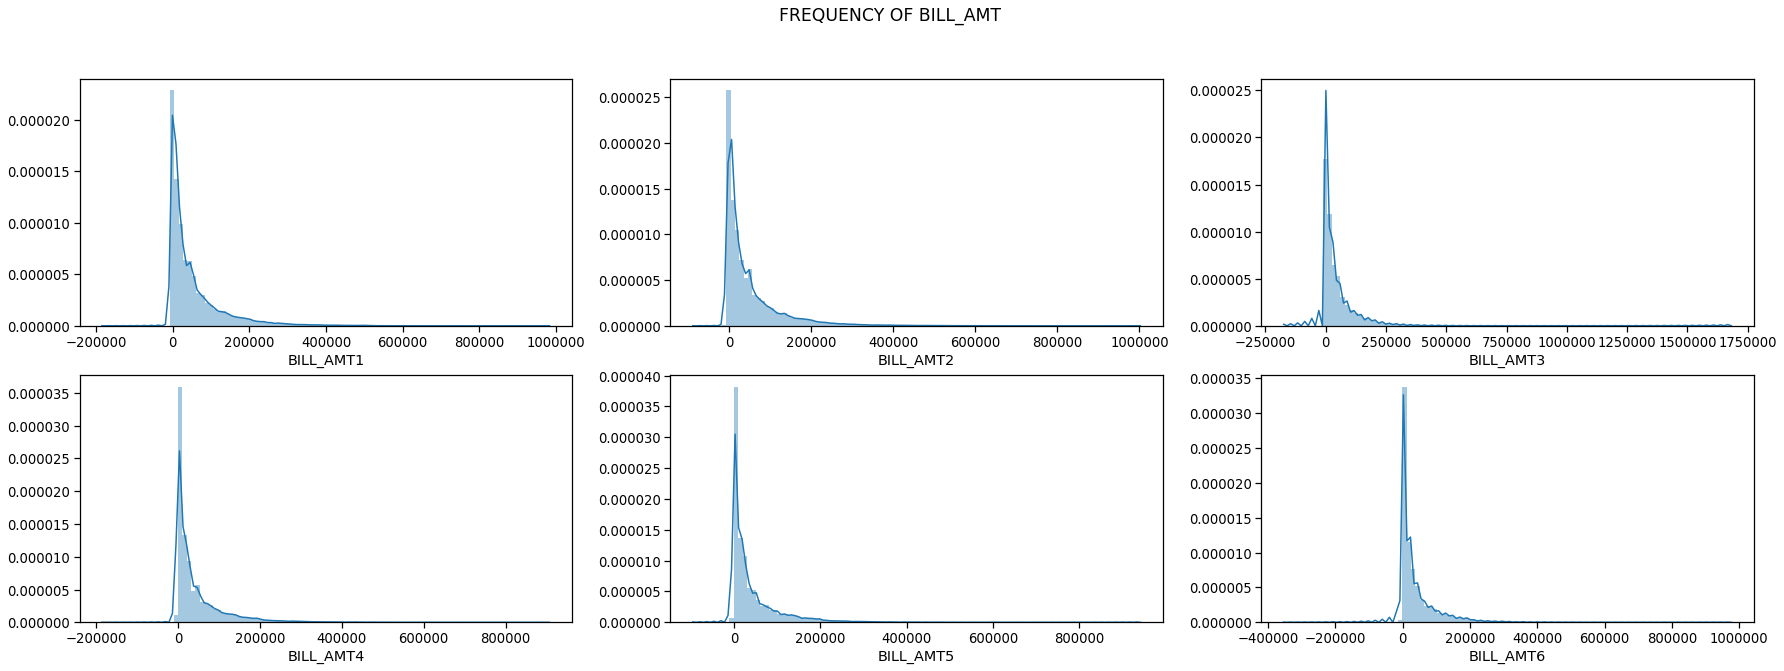

In [59]:
# Frequency of Bill Amount
f, axes = plt.subplots(2, 3, figsize=(30, 10), facecolor='white')
f.suptitle('FREQUENCY OF BILL_AMT')
ax1 = sns.distplot(credit["BILL_AMT1"] , bins = 100 , ax=axes[0,0])
ax2 = sns.distplot(credit["BILL_AMT2"] , bins = 100 , ax=axes[0,1])
ax3 = sns.distplot(credit["BILL_AMT3"] , bins = 100 , ax=axes[0,2])
ax4 = sns.distplot(credit["BILL_AMT4"] , bins = 100 , ax=axes[1,0])
ax5 = sns.distplot(credit["BILL_AMT5"] , bins = 100 , ax=axes[1,1])
ax6 = sns.distplot(credit["BILL_AMT6"] , bins = 100 , ax=axes[1,2])
# Amount of bill statement (NT dollar)

**Maximum people found in billing amount ranging from 0 to $100,000.**

### Summary of Payment Amount

(0, 50000)

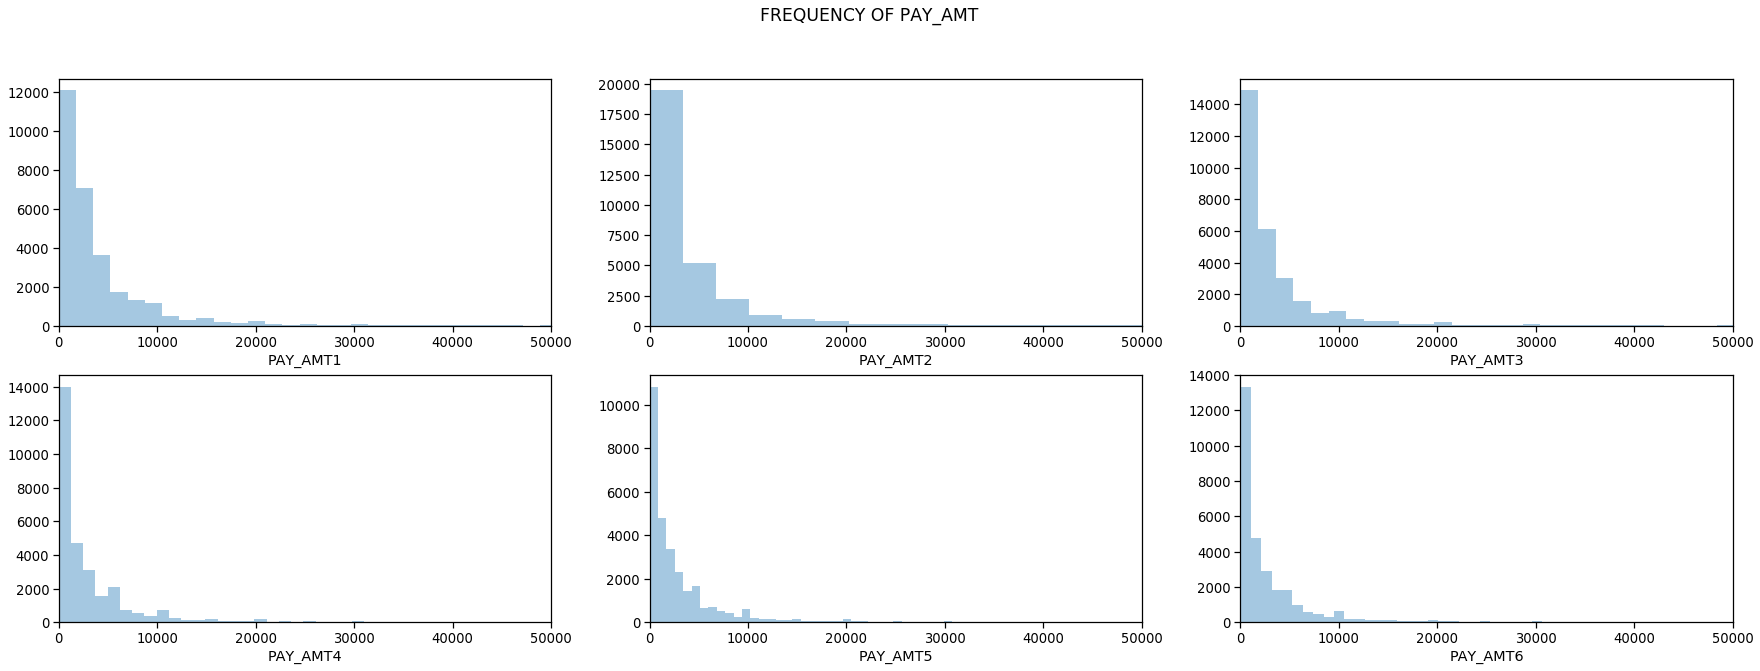

In [60]:
# Frequency of Payment Amount
f, axes = plt.subplots(2, 3, figsize=(30 , 10) , facecolor='white')
f.suptitle('FREQUENCY OF PAY_AMT')
ax1 = sns.distplot(credit["PAY_AMT1"] , bins = 500 , ax=axes[0,0] , kde = False)
ax1.set_xlim([0, 50000])
ax2 = sns.distplot(credit["PAY_AMT2"] , bins = 500 , ax=axes[0,1] , kde = False)
ax2.set_xlim([0, 50000])
ax3 = sns.distplot(credit["PAY_AMT3"] , bins = 500 , ax=axes[0,2] , kde = False)
ax3.set_xlim([0, 50000])
ax4 = sns.distplot(credit["PAY_AMT4"] , bins = 500 , ax=axes[1,0] , kde = False)
ax4.set_xlim([0, 50000])
ax5 = sns.distplot(credit["PAY_AMT5"] , bins = 500 , ax=axes[1,1] , kde = False)
ax5.set_xlim([0, 50000])
ax6 = sns.distplot(credit["PAY_AMT6"] , bins = 500 , ax=axes[1,2] , kde = False)
ax6.set_xlim([0, 50000])
# Amount of previous payment (NT dollar)

**Per billing amount maximum number of people paid perious payments ranging between 0 to $10000 in all cases.**

### Understanding Distribution of data and boxplots to find any outliers

### 1) Gender

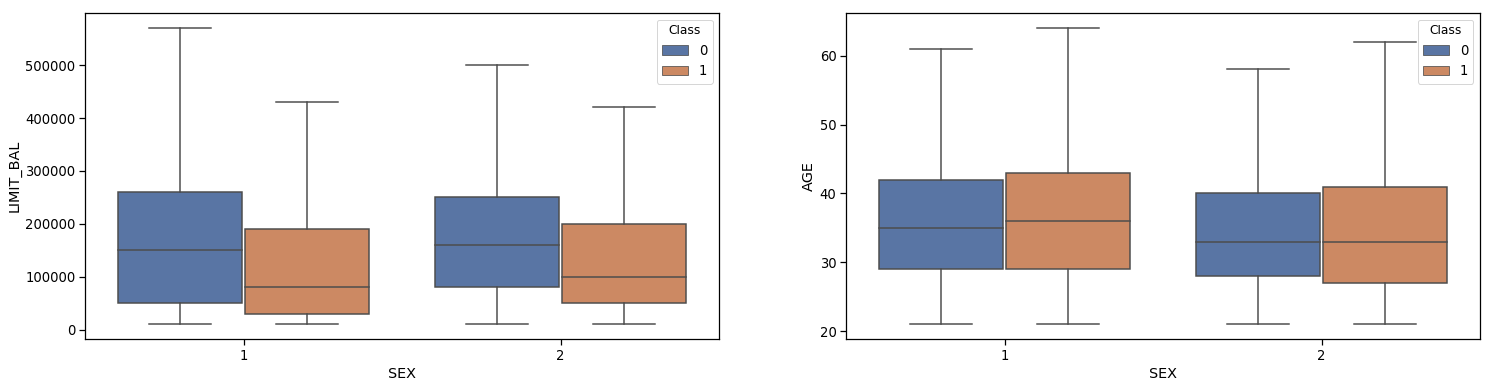

In [41]:
# Boxplot - Limit Balance vs. Sex
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(25,6))
s = sns.boxplot(ax = ax1, x="SEX", y="LIMIT_BAL", hue="Class",data=credit, palette="deep",showfliers=False)
s = sns.boxplot(ax = ax2, x="SEX", y="AGE", hue="Class",data=credit, palette="deep",showfliers=False)
plt.show();
# showfliers : bool, optional (True) Show the outliers beyond the caps.

**For both credit limit and age non-defaulters have similar distribution of males and females. While in case of defaulters, median credit limit is lower than non-defaulters but shows median age similar to non-defaulters.**

### 2) Education

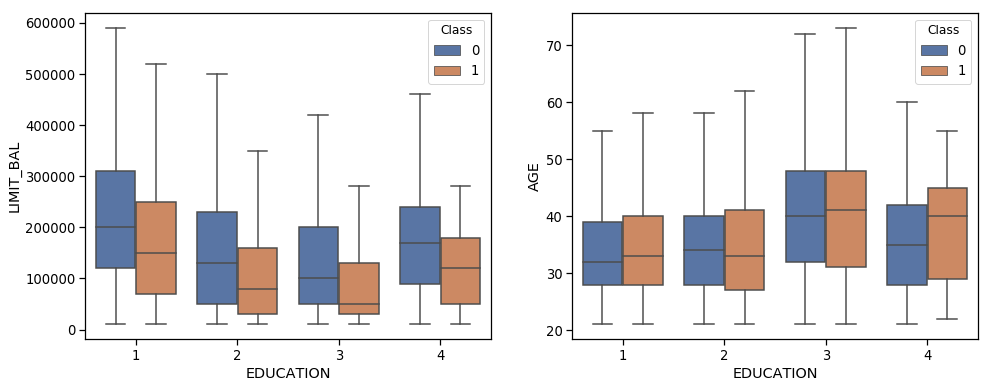

In [42]:
# Boxplot - Limit Balance vs. Education
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16,6))
s = sns.boxplot(ax = ax1, x="EDUCATION", y="LIMIT_BAL", hue="Class",data=credit, palette="deep",showfliers=False)
s = sns.boxplot(ax = ax2, x="EDUCATION", y="AGE", hue="Class",data=credit, palette="deep",showfliers=False)
plt.show();

**Non-defaulters (class 0) highest median credit limit for education level 1 - graduate and lowest for education level 3 - high school. Overall non-defaulters show higher credit limit than defaulters (class 1). While in case of age non-defaulters show slightly less age range as compared to defaulters. Median age is found to be highest in education level 3 - high school.**

### 2) Marriage

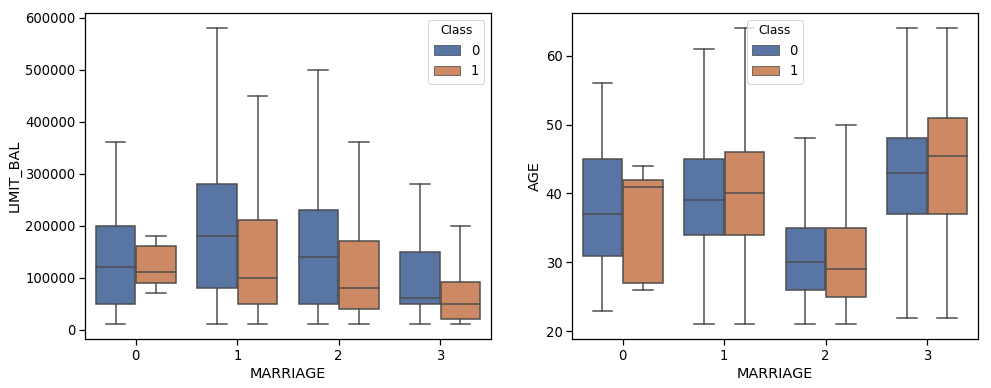

In [43]:
# Boxplot - Limit Balance vs. Marriage
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16,6))
s = sns.boxplot(ax = ax1, x="MARRIAGE", y="LIMIT_BAL", hue="Class",data=credit, palette="deep",showfliers=False)
s = sns.boxplot(ax = ax2, x="MARRIAGE", y="AGE", hue="Class",data=credit, palette="deep",showfliers=False)
plt.show();

**Married people (marital status - 1) show highest median credit limit while divorced people show least. Singles (martital status - 2) shows lowest median age for both classes while divorced (martial status - 3) show highest median age in both classes.**

## Conclusions from EDA:

1.	Potential defaulters show higher frequency of lower limit of amount of credit limit.
2.	Non –defaulters show higher proportion in 25 to 40 years of age group.
3.	Non-defaulters have high proportion of females.
4.	Non-defaulters - singles and married in higher proportion.
5.	Non-defaulters have higher level of education (1 – graduate or 2 – university)
6.	People who had history of paying previous payments ahead of time are less likely to default next month.  

## Correlation

In [61]:
corrMat = credit.corr()
print(corrMat)

           LIMIT_BAL       SEX  EDUCATION  MARRIAGE       AGE     PAY_1  \
LIMIT_BAL   1.000000  0.024755  -0.231088 -0.108139  0.144713 -0.271214   
SEX         0.024755  1.000000   0.013627 -0.031389 -0.090874 -0.057643   
EDUCATION  -0.231088  0.013627   1.000000 -0.149134  0.182434  0.112593   
MARRIAGE   -0.108139 -0.031389  -0.149134  1.000000 -0.414170  0.019917   
AGE         0.144713 -0.090874   0.182434 -0.414170  1.000000 -0.039447   
PAY_1      -0.271214 -0.057643   0.112593  0.019917 -0.039447  1.000000   
PAY_2      -0.296382 -0.070771   0.129703  0.024199 -0.050148  0.672164   
PAY_3      -0.286123 -0.066096   0.122425  0.032688 -0.053048  0.574245   
PAY_4      -0.267460 -0.060173   0.116531  0.033122 -0.049722  0.538841   
PAY_5      -0.249411 -0.055064   0.104088  0.035629 -0.053826  0.509426   
PAY_6      -0.235195 -0.044008   0.088986  0.034345 -0.048773  0.474553   
BILL_AMT1   0.285430 -0.033642   0.016597 -0.023472  0.056239  0.187068   
BILL_AMT2   0.278314 -0.0

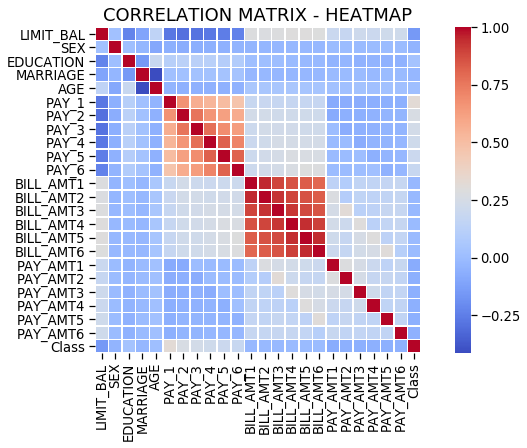

In [62]:
corr = credit.corr() # .corr is used to find corelation
f,ax = plt.subplots(figsize=(12, 6))
sns.heatmap(corr, cbar = True,  square = True, annot = False, fmt= '.1f', 
            xticklabels= True, yticklabels= True
            ,cmap="coolwarm", linewidths=.5, ax=ax)
plt.title('CORRELATION MATRIX - HEATMAP', size=18);

**The heatmat shows positively correlated features (collinearity), such us PAY_1,2,3,4,5,6 and BILL_AMT1,2,3,4,5,6.**

**Data that is uncorrelated is more usefull since such data is discriminatory.**

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

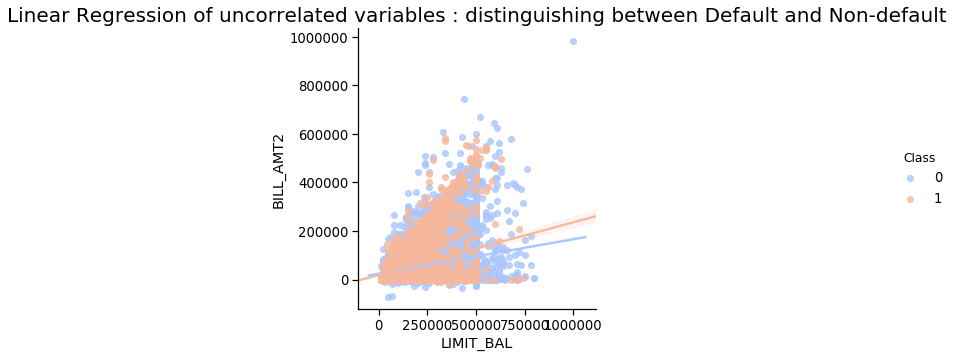

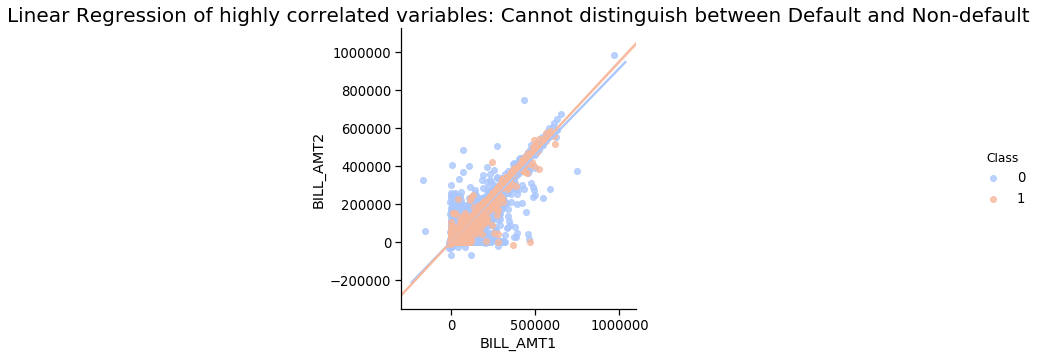

In [64]:
sns.lmplot(x='LIMIT_BAL', y= 'BILL_AMT2', data = credit, hue ='Class', 
           palette='coolwarm')
plt.title('Linear Regression of uncorrelated variables : distinguishing between Default and Non-default', size=20)


sns.lmplot(x='BILL_AMT1', y= 'BILL_AMT2', data = credit, hue ='Class', 
           palette='coolwarm')
plt.title('Linear Regression of highly correlated variables: Cannot distinguish between Default and Non-default', size=20);

#### Collinerity - Previous Payment Amount

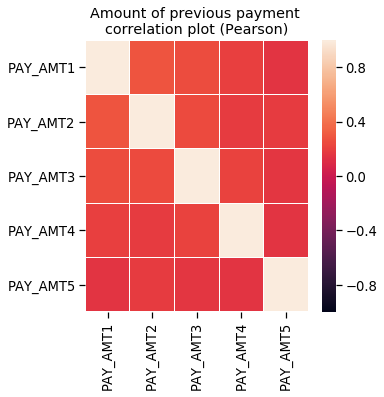

In [46]:
var_PAY_AMT = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5']

plt.figure(figsize = (5,5))
plt.title('Amount of previous payment \ncorrelation plot (Pearson)')
corr = credit[var_PAY_AMT].corr()
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

**No significant correlation is observed for previous payment amount.**

In [66]:
# Checking collinearity between previous payment history
creditCollinearity_pay_amt= credit[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']]
PAY_AMT_Coll = creditCollinearity_pay_amt.corr()
print(PAY_AMT_Coll)

          PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6
PAY_AMT1  1.000000  0.285576  0.252191  0.199558  0.148459  0.185735
PAY_AMT2  0.285576  1.000000  0.244770  0.180107  0.180908  0.157634
PAY_AMT3  0.252191  0.244770  1.000000  0.216325  0.159214  0.162740
PAY_AMT4  0.199558  0.180107  0.216325  1.000000  0.151830  0.157834
PAY_AMT5  0.148459  0.180908  0.159214  0.151830  1.000000  0.154896
PAY_AMT6  0.185735  0.157634  0.162740  0.157834  0.154896  1.000000


**No correlations with greater than 0.9 were observed.**

#### Collinearity - Billing Amount

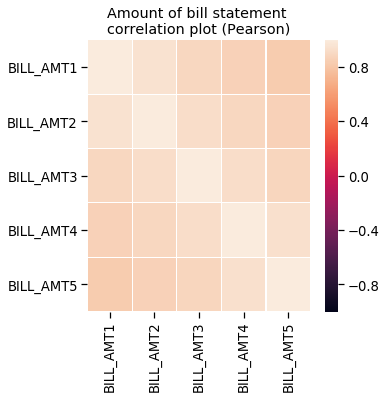

In [49]:
# Checking for collinearity in Bill Amount variables
var_BILL_AMT = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5']
plt.figure(figsize = (5,5))
plt.title('Amount of bill statement \ncorrelation plot (Pearson)')
corr = credit[var_BILL_AMT].corr()
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

**Decreasing correlation from month to month and lowest correlation between month of April and September.**

In [67]:
# Checking collinearity between bill amounts for all months
creditCollinearity = credit[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']]
# Checking Collinearity
BILL_AMT_Coll = creditCollinearity.corr()
print(BILL_AMT_Coll)

           BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6
BILL_AMT1   1.000000   0.951484   0.892279   0.860272   0.829779   0.802650
BILL_AMT2   0.951484   1.000000   0.928326   0.892482   0.859778   0.831594
BILL_AMT3   0.892279   0.928326   1.000000   0.923969   0.883910   0.853320
BILL_AMT4   0.860272   0.892482   0.923969   1.000000   0.940134   0.900941
BILL_AMT5   0.829779   0.859778   0.883910   0.940134   1.000000   0.946197
BILL_AMT6   0.802650   0.831594   0.853320   0.900941   0.946197   1.000000


**After confirming billing amount collinearity BILL_AMT (2/4/5) were removed from dataset.**

In [80]:
# Removing variables with high collinearily
credit = credit.drop(['BILL_AMT2'], axis=1)
credit = credit.drop(['BILL_AMT4'], axis=1)
credit = credit.drop(['BILL_AMT5'], axis=1)

In [68]:
# Confirming removal of variables with high collinearity
credit.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Class'],
      dtype='object')

#### Collinearity - Previous Payment History

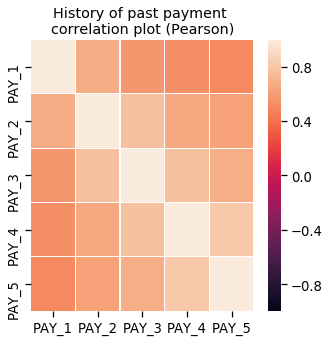

In [69]:
var_PAY = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5']

plt.figure(figsize = (5,5))
plt.title('History of past payment \ncorrelation plot (Pearson)')
corr = credit[var_PAY].corr()
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

**Previous payments show decresing correlation with increasing months. Least correlation observed for April-September.**

In [70]:
# Checking collinearity between previous payment history
creditCollinearity_pay= credit[['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']]
PAY_Coll = creditCollinearity_pay.corr()
print(PAY_Coll)

          PAY_1     PAY_2     PAY_3     PAY_4     PAY_5     PAY_6
PAY_1  1.000000  0.672164  0.574245  0.538841  0.509426  0.474553
PAY_2  0.672164  1.000000  0.766552  0.662067  0.622780  0.575501
PAY_3  0.574245  0.766552  1.000000  0.777359  0.686775  0.632684
PAY_4  0.538841  0.662067  0.777359  1.000000  0.819835  0.716449
PAY_5  0.509426  0.622780  0.686775  0.819835  1.000000  0.816900
PAY_6  0.474553  0.575501  0.632684  0.716449  0.816900  1.000000


**No correlations with greater than 0.9 were observed.**

In [82]:
credit.to_csv('Credit_Mod.csv')

# Building Classifier Models

In [10]:
# Importing data - New data set modified after EDA
new_credit = pd.read_csv('Credit_Mod.csv')

In [11]:
# Checking data
new_credit.head()

,Unnamed: 0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT1,BILL_AMT3,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Class
0,0,20000,2,2,1,24,2,2,-1,-1,...,3913,689,0,0,689,0,0,0,0,1
1,1,120000,2,2,2,26,-1,2,0,0,...,2682,2682,3261,0,1000,1000,1000,0,2000,1
2,2,90000,2,2,2,34,0,0,0,0,...,29239,13559,15549,1518,1500,1000,1000,1000,5000,0
3,3,50000,2,2,1,37,0,0,0,0,...,46990,49291,29547,2000,2019,1200,1100,1069,1000,0
4,4,50000,1,2,1,57,-1,0,-1,0,...,8617,35835,19131,2000,36681,10000,9000,689,679,0


In [15]:
new_credit.columns

Index(['Unnamed: 0', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT3', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Class'],
      dtype='object')

In [16]:
new_credit.drop('Unnamed: 0', axis = 1, inplace =True)

In [17]:
new_credit.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT3',
       'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'Class'],
      dtype='object')

## Selecting Data

In [18]:
# Selecting independent features
features = new_credit.iloc[:,0:20]
print('Summary of feature sample')
features.head()

Summary of feature sample


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT3,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,689,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,2682,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,0,29239,13559,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,0,46990,49291,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,35835,19131,2000,36681,10000,9000,689,679


In [19]:
# Selcting dependent variable
depVar = new_credit.iloc[:,20:21]
print('Summary of dependent variable sample')
depVar.head()

Summary of dependent variable sample


,Class
0,1
1,1
2,0
3,0
4,0


## Feature Engineering 

### 1) Normalizing Data

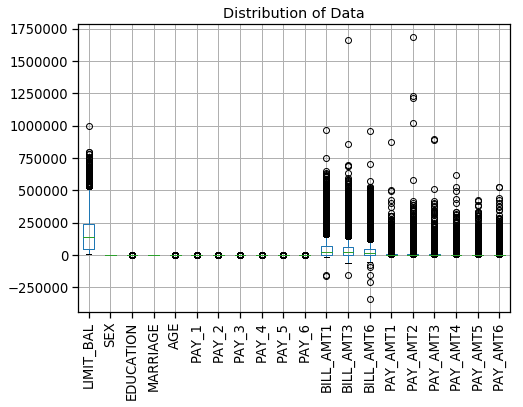

In [71]:
# Boxplot showing that data is distibuted in wide range
fig=plt.figure()
ax = fig.add_axes([0,0,1,1])
ax= features.boxplot(features.columns.name, rot=90)
plt.title('Distribution of Data')
plt.show()

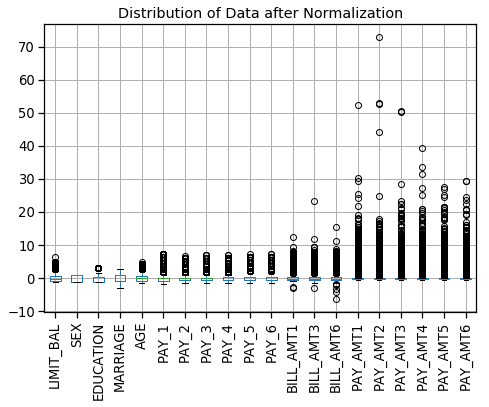

In [72]:
# Normalizing data
normalized_features = (features - features.mean())/features.std()
fig=plt.figure()
ax = fig.add_axes([0,0,1,1])
ax= normalized_features.boxplot(normalized_features.columns.name, rot=90) # Plot to show features are normalized
plt.title('Distribution of Data after Normalization')
plt.show()

### 2) Recurssive Feature Elimination (RFE) 

In [88]:
model_RFE = LogisticRegression()
rfe_norm = RFE(model_RFE)
fit_norm = rfe_norm.fit(normalized_features , np.ravel(depVar))
print(" (1) Total Number of Important Variables:", fit_norm.n_features_)
print(" (2) Normalized Variables/Feature Ranking:", fit_norm.ranking_)

# Calculate model score with normalized variables
score_norm = rfe_norm.score(normalized_features , np.ravel(depVar))
print(" (3) Model score with normalized variables is: %f (%f)" % (score_norm.mean(), score_norm.std()))

# Names of top 10 most important features
feature_names = np.array(normalized_features.columns)
print(" (4) Most important features (RFE): %s" % feature_names[rfe_norm.support_])

 (1) Total Number of Important Variables: 10
 (2) Normalized Variables/Feature Ranking: [ 1  8  1  1  2  1  1  1 10  3 11  1  1  6  1  1  7  4  5  9]
 (3) Model score with normalized variables is: 0.809833 (0.000000)
 (4) Most important features (RFE): ['LIMIT_BAL' 'EDUCATION' 'MARRIAGE' 'PAY_1' 'PAY_2' 'PAY_3' 'BILL_AMT1'
 'BILL_AMT3' 'PAY_AMT1' 'PAY_AMT2']


In [89]:
# Creating dataset with important variables 
credit_impVar = normalized_features[['LIMIT_BAL' , 'EDUCATION' , 'MARRIAGE' , 'PAY_1' , 'PAY_2' , 'PAY_3' , 'BILL_AMT1' ,
 'BILL_AMT3' , 'PAY_AMT1' , 'PAY_AMT2']]
credit_impVar.head()

,LIMIT_BAL,EDUCATION,MARRIAGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT3,PAY_AMT1,PAY_AMT2
0,-1.136701,0.211866,-1.057277,1.794534,1.782318,-0.696652,-0.642490,-0.667982,-0.341936,-0.227082
1,-0.365974,0.211866,0.858543,-0.874977,1.782318,0.138862,-0.659208,-0.639244,-0.341936,-0.213584
2,-0.597192,0.211866,0.858543,0.014860,0.111734,0.138862,-0.298555,-0.482400,-0.250287,-0.191884
3,-0.905483,0.211866,-1.057277,0.014860,0.111734,0.138862,-0.057490,0.032846,-0.221187,-0.169358
4,-0.905483,0.211866,-1.057277,-0.874977,0.111734,-0.696652,-0.578608,-0.161186,-0.221187,1.335012


### 4) One Hot Encoding

In [94]:
# Categorical Variables
categorical_var = ['EDUCATION' , 'SEX' , 'MARRIAGE' , 'PAY_1' , 'PAY_2' , 'PAY_3' , 'PAY_4' , 'PAY_5' , 'PAY_6']

In [95]:
# Dataframe with dummy variables
dummies = pd.get_dummies(new_credit , columns=categorical_var , drop_first=True)
dummies.head(5)

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT3,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,...,PAY_5_8,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,20000,24,3913,689,0,0,689,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,120000,26,2682,2682,3261,0,1000,1000,1000,0,...,0,0,0,1,0,0,0,0,0,0
2,90000,34,29239,13559,15549,1518,1500,1000,1000,1000,...,0,0,1,0,0,0,0,0,0,0
3,50000,37,46990,49291,29547,2000,2019,1200,1100,1069,...,0,0,1,0,0,0,0,0,0,0
4,50000,57,8617,35835,19131,2000,36681,10000,9000,689,...,0,0,1,0,0,0,0,0,0,0


In [97]:
dummies.columns

Index(['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT3', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Class',
       'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4', 'SEX_2', 'MARRIAGE_1',
       'MARRIAGE_2', 'MARRIAGE_3', 'PAY_1_-1', 'PAY_1_0', 'PAY_1_1', 'PAY_1_2',
       'PAY_1_3', 'PAY_1_4', 'PAY_1_5', 'PAY_1_6', 'PAY_1_7', 'PAY_1_8',
       'PAY_2_-1', 'PAY_2_0', 'PAY_2_1', 'PAY_2_2', 'PAY_2_3', 'PAY_2_4',
       'PAY_2_5', 'PAY_2_6', 'PAY_2_7', 'PAY_2_8', 'PAY_3_-1', 'PAY_3_0',
       'PAY_3_1', 'PAY_3_2', 'PAY_3_3', 'PAY_3_4', 'PAY_3_5', 'PAY_3_6',
       'PAY_3_7', 'PAY_3_8', 'PAY_4_-1', 'PAY_4_0', 'PAY_4_1', 'PAY_4_2',
       'PAY_4_3', 'PAY_4_4', 'PAY_4_5', 'PAY_4_6', 'PAY_4_7', 'PAY_4_8',
       'PAY_5_-1', 'PAY_5_0', 'PAY_5_2', 'PAY_5_3', 'PAY_5_4', 'PAY_5_5',
       'PAY_5_6', 'PAY_5_7', 'PAY_5_8', 'PAY_6_-1', 'PAY_6_0', 'PAY_6_2',
       'PAY_6_3', 'PAY_6_4', 'PAY_6_5', 'PAY_6_6', 'PAY_6_7', 'PAY_6_8'],
      dtype='object')

In [99]:
# Moving "Class" column to last
dummies = dummies[['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT3', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4', 'SEX_2', 'MARRIAGE_1',
       'MARRIAGE_2', 'MARRIAGE_3', 'PAY_1_-1', 'PAY_1_0', 'PAY_1_1', 'PAY_1_2',
       'PAY_1_3', 'PAY_1_4', 'PAY_1_5', 'PAY_1_6', 'PAY_1_7', 'PAY_1_8',
       'PAY_2_-1', 'PAY_2_0', 'PAY_2_1', 'PAY_2_2', 'PAY_2_3', 'PAY_2_4',
       'PAY_2_5', 'PAY_2_6', 'PAY_2_7', 'PAY_2_8', 'PAY_3_-1', 'PAY_3_0',
       'PAY_3_1', 'PAY_3_2', 'PAY_3_3', 'PAY_3_4', 'PAY_3_5', 'PAY_3_6',
       'PAY_3_7', 'PAY_3_8', 'PAY_4_-1', 'PAY_4_0', 'PAY_4_1', 'PAY_4_2',
       'PAY_4_3', 'PAY_4_4', 'PAY_4_5', 'PAY_4_6', 'PAY_4_7', 'PAY_4_8',
       'PAY_5_-1', 'PAY_5_0', 'PAY_5_2', 'PAY_5_3', 'PAY_5_4', 'PAY_5_5',
       'PAY_5_6', 'PAY_5_7', 'PAY_5_8', 'PAY_6_-1', 'PAY_6_0', 'PAY_6_2',
       'PAY_6_3', 'PAY_6_4', 'PAY_6_5', 'PAY_6_6', 'PAY_6_7', 'PAY_6_8' , 'Class']]
dummies.columns

Index(['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT3', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4', 'SEX_2', 'MARRIAGE_1',
       'MARRIAGE_2', 'MARRIAGE_3', 'PAY_1_-1', 'PAY_1_0', 'PAY_1_1', 'PAY_1_2',
       'PAY_1_3', 'PAY_1_4', 'PAY_1_5', 'PAY_1_6', 'PAY_1_7', 'PAY_1_8',
       'PAY_2_-1', 'PAY_2_0', 'PAY_2_1', 'PAY_2_2', 'PAY_2_3', 'PAY_2_4',
       'PAY_2_5', 'PAY_2_6', 'PAY_2_7', 'PAY_2_8', 'PAY_3_-1', 'PAY_3_0',
       'PAY_3_1', 'PAY_3_2', 'PAY_3_3', 'PAY_3_4', 'PAY_3_5', 'PAY_3_6',
       'PAY_3_7', 'PAY_3_8', 'PAY_4_-1', 'PAY_4_0', 'PAY_4_1', 'PAY_4_2',
       'PAY_4_3', 'PAY_4_4', 'PAY_4_5', 'PAY_4_6', 'PAY_4_7', 'PAY_4_8',
       'PAY_5_-1', 'PAY_5_0', 'PAY_5_2', 'PAY_5_3', 'PAY_5_4', 'PAY_5_5',
       'PAY_5_6', 'PAY_5_7', 'PAY_5_8', 'PAY_6_-1', 'PAY_6_0', 'PAY_6_2',
       'PAY_6_3', 'PAY_6_4', 'PAY_6_5', 'PAY_6_6', 'PAY_6_7', 'PAY_6_8',
       'Class'],
      dtype='object')

In [100]:
#features
features_dum = dummies[['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT3', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6' , 
       'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4', 'SEX_2',
       'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3', 'PAY_1_-1', 'PAY_1_0',
       'PAY_1_1', 'PAY_1_2', 'PAY_1_3', 'PAY_1_4', 'PAY_1_5', 'PAY_1_6',
       'PAY_1_7', 'PAY_1_8', 'PAY_2_-1', 'PAY_2_0', 'PAY_2_1', 'PAY_2_2',
       'PAY_2_3', 'PAY_2_4', 'PAY_2_5', 'PAY_2_6', 'PAY_2_7', 'PAY_2_8',
       'PAY_3_-1', 'PAY_3_0', 'PAY_3_1', 'PAY_3_2', 'PAY_3_3', 'PAY_3_4',
       'PAY_3_5', 'PAY_3_6', 'PAY_3_7', 'PAY_3_8', 'PAY_4_-1', 'PAY_4_0',
       'PAY_4_1', 'PAY_4_2', 'PAY_4_3', 'PAY_4_4', 'PAY_4_5', 'PAY_4_6',
       'PAY_4_7', 'PAY_4_8', 'PAY_5_-1', 'PAY_5_0', 'PAY_5_2', 'PAY_5_3',
       'PAY_5_4', 'PAY_5_5', 'PAY_5_6', 'PAY_5_7', 'PAY_5_8', 'PAY_6_-1',
       'PAY_6_0', 'PAY_6_2', 'PAY_6_3', 'PAY_6_4', 'PAY_6_5', 'PAY_6_6',
       'PAY_6_7', 'PAY_6_8']]
print('Summary of feature sample')
features_dum.head()

Summary of feature sample


,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT3,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,...,PAY_5_8,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,20000,24,3913,689,0,0,689,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,120000,26,2682,2682,3261,0,1000,1000,1000,0,...,0,0,0,1,0,0,0,0,0,0
2,90000,34,29239,13559,15549,1518,1500,1000,1000,1000,...,0,0,1,0,0,0,0,0,0,0
3,50000,37,46990,49291,29547,2000,2019,1200,1100,1069,...,0,0,1,0,0,0,0,0,0,0
4,50000,57,8617,35835,19131,2000,36681,10000,9000,689,...,0,0,1,0,0,0,0,0,0,0


In [101]:
# Dependent variable in dummies dataset
depVar_dum = dummies.iloc[:,76:77]
depVar_dum.head()

,Class
0,1
1,1
2,0
3,0
4,0


## Spliting the data into train and test sets

#### 1) Original Data

In [76]:
# Splitting data with original data 
x_train , x_test , y_train , y_test = train_test_split(features , depVar , test_size = 0.25 , random_state = 123)

In [112]:
# Checking independent training set
x_train.shape , x_test.shape

((22500, 20), (7500, 20))

In [111]:
# Checking dependent training set
y_train.shape , y_test.shape

((22500, 1), (7500, 1))

#### 2) Normalized Data

In [108]:
# Splitting data with normalized data 
x_tra , x_t , y_tra , y_t = train_test_split(normalized_features , depVar , test_size = 0.25 , random_state = 123)

In [110]:
# Checking independent variable training set
x_tra.shape , x_t.shape

((22500, 20), (7500, 20))

In [109]:
# Checking dependent training set
y_tra.shape , y_t.shape

((22500, 1), (7500, 1))

#### 3) RFE modified data

In [91]:
# Splitting data wit important variables data 
x_tra_imp , x_t_imp , y_tra_imp , y_t_imp = train_test_split(credit_impVar , depVar , test_size = 0.25 , random_state = 123)

In [106]:
# Checking independent variable training set
x_tra_imp.shape , x_t_imp.shape

((22500, 10), (7500, 10))

In [105]:
# Checking dependent training set
y_tra_imp.shape , y_t_imp.shape

((22500, 1), (7500, 1))

#### 4) One Hot Coded - Dummies Dataset

In [102]:
# Splitting data wit important variables data 
x_tra_dum , x_t_dum , y_tra_dum , y_t_dum = train_test_split(features_dum , depVar_dum , test_size = 0.25 , random_state = 123)

In [104]:
# # Checking independent variable training set
x_tra_dum.shape , x_t_dum.shape

((22500, 76), (7500, 76))

In [113]:
y_tra_dum.shape , y_t_dum.shape

((22500, 1), (7500, 1))

## Building Models

### MODEL 1 - Logistic Regression

##### Logistic regression - original dataset

Accuracy: 0.7830666666666667
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      5873
           1       0.50      0.00      0.00      1627

    accuracy                           0.78      7500
   macro avg       0.64      0.50      0.44      7500
weighted avg       0.72      0.78      0.69      7500

Average 5-Fold CV Score: 0.7773
Standard deviation: 0.0001
ROC_AUC_LogR: 0.5002221787097539


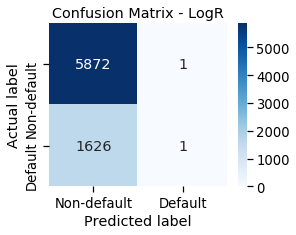

In [115]:
algo_LogR = LogisticRegression(n_jobs=-1 , C=1.0 , 
                               penalty='l2', 
                               dual=False , 
                               max_iter=110 , random_state=123)

algo_LogR.fit(x_train, np.ravel(y_train))
algo_LogR.score(x_train,y_train)
predictions_LogR = algo_LogR.predict(x_test)

accuracy_LogR = accuracy_score( y_test, predictions_LogR)
print('Accuracy:', accuracy_LogR)
print(classification_report(y_test, predictions_LogR))

cv_score_LogR = cross_val_score(algo_LogR, x_train, np.ravel(y_train) , cv = 5)


print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_score_LogR),4)))
print ("Standard deviation: {}".format(round(np.std(cv_score_LogR),4)))

cm_LogR = confusion_matrix( y_test, predictions_LogR)
cm_LogR
plt.figure(figsize=(4,3))
sns.heatmap(cm_LogR,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - LogR")

roc_auc_LogR = roc_auc_score(y_test, predictions_LogR)
print('ROC_AUC_LogR:' , roc_auc_LogR)

##### Logistic regression - Normalized data

Accuracy: 0.8122666666666667
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      5873
           1       0.69      0.24      0.36      1627

    accuracy                           0.81      7500
   macro avg       0.76      0.61      0.62      7500
weighted avg       0.79      0.81      0.77      7500

Average 5-Fold CV Score: 0.8096
Standard deviation: 0.0026
Normalized ROC_AUC_LogR: 0.6055165204993087


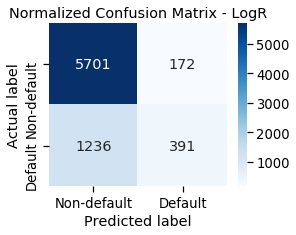

In [116]:
norm_algo_LogR = LogisticRegression(n_jobs=-1 , C=1.0 , 
                               penalty='l2', 
                               dual=False , 
                               max_iter=110 , random_state=123)

norm_algo_LogR.fit(x_tra, np.ravel(y_tra))
norm_algo_LogR.score(x_tra,y_tra)
norm_predictions_LogR = norm_algo_LogR.predict(x_t)

norm_accuracy_LogR = accuracy_score( y_t, norm_predictions_LogR)
print('Accuracy:', norm_accuracy_LogR)
print(classification_report(y_t , norm_predictions_LogR))

norm_cv_score_LogR = cross_val_score(norm_algo_LogR, x_tra, np.ravel(y_tra) , cv = 5)


print("Average 5-Fold CV Score: {}".format(round(np.mean(norm_cv_score_LogR),4)))
print ("Standard deviation: {}".format(round(np.std(norm_cv_score_LogR),4)))

norm_cm_LogR = confusion_matrix( y_t , norm_predictions_LogR)
norm_cm_LogR
plt.figure(figsize=(4,3))
sns.heatmap(norm_cm_LogR,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title("Normalized Confusion Matrix - LogR")

norm_roc_auc_LogR = roc_auc_score(y_t , norm_predictions_LogR)
print('Normalized ROC_AUC_LogR:' , norm_roc_auc_LogR)

##### Logistic Regression - Important variables

Accuracy: 0.8116
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      5873
           1       0.69      0.24      0.35      1627

    accuracy                           0.81      7500
   macro avg       0.76      0.60      0.62      7500
weighted avg       0.79      0.81      0.77      7500

Average 5-Fold CV Score: 0.8087
Standard deviation: 0.003
Important Variable ROC_AUC_LogR: 0.6035355927048777


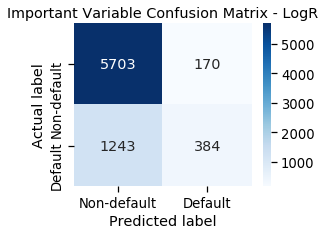

In [117]:
impVar_LogR = LogisticRegression(n_jobs=-1 , C=1.0 , 
                               penalty='l2', 
                               dual=False , 
                               max_iter=110 , random_state=123)

impVar_LogR.fit(x_tra_imp, np.ravel(y_tra_imp))
impVar_LogR.score(x_tra_imp,y_tra_imp)
impVar_predictions_LogR = impVar_LogR.predict(x_t_imp)

impVar_accuracy_LogR = accuracy_score( y_t_imp, impVar_predictions_LogR)
print('Accuracy:', impVar_accuracy_LogR)
print(classification_report(y_t_imp , impVar_predictions_LogR))

impVar_cv_score_LogR = cross_val_score(impVar_LogR, x_tra_imp , np.ravel(y_tra_imp) , cv = 5)


print("Average 5-Fold CV Score: {}".format(round(np.mean(impVar_cv_score_LogR),4)))
print ("Standard deviation: {}".format(round(np.std(impVar_cv_score_LogR),4)))

impVar_cm_LogR = confusion_matrix( y_t_imp , impVar_predictions_LogR)
impVar_cm_LogR
plt.figure(figsize=(4,3))
sns.heatmap(impVar_cm_LogR,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title("Important Variable Confusion Matrix - LogR")

impVar_roc_auc_LogR = roc_auc_score(y_t_imp , impVar_predictions_LogR)
print('Important Variable ROC_AUC_LogR:' , impVar_roc_auc_LogR)

##### Logistic Regression - Dummy Variables

Accuracy: 0.7832
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      5873
           1       0.67      0.00      0.00      1627

    accuracy                           0.78      7500
   macro avg       0.72      0.50      0.44      7500
weighted avg       0.76      0.78      0.69      7500

Average 5-Fold CV Score: 0.7772
Standard deviation: 0.0003
DUMMY VARIABLES ROC_AUC_LogR: 0.5005294927847386


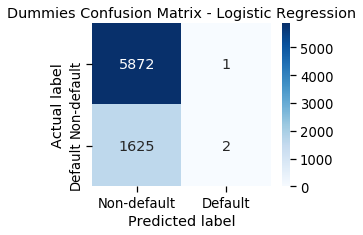

In [119]:
dum_LogR = LogisticRegression(n_jobs=-1 , C=1.0 , 
                               penalty='l2', 
                               dual=False , 
                            random_state=123)

dum_LogR.fit(x_tra_dum, np.ravel(y_tra_dum))
dum_LogR.score(x_tra_dum , y_tra_dum)
dum_predictions_LogR = dum_LogR.predict(x_t_dum)

dum_accuracy_LogR = accuracy_score( y_t_dum , dum_predictions_LogR )
print('Accuracy:', dum_accuracy_LogR)
print(classification_report(y_t_dum , dum_predictions_LogR))

dum_cv_score_LogR = cross_val_score(dum_LogR, x_tra_dum , np.ravel(y_tra_dum) , cv = 5)


print("Average 5-Fold CV Score: {}".format(round(np.mean(dum_cv_score_LogR),4)))
print ("Standard deviation: {}".format(round(np.std(dum_cv_score_LogR),4)))

dum_cm_LogR = confusion_matrix( y_t_dum, dum_predictions_LogR)
dum_cm_LogR
plt.figure(figsize=(4,3))
sns.heatmap(dum_cm_LogR,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title("Dummies Confusion Matrix - Logistic Regression")

dum_roc_auc_LogR = roc_auc_score(y_t_dum , dum_predictions_LogR)
print('DUMMY VARIABLES ROC_AUC_LogR:' , dum_roc_auc_LogR)

### MODEL 2 - Random Forest

#### Random Forest - Original Dataset

Accuracy: 0.8150666666666667
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      5873
           1       0.62      0.38      0.47      1627

    accuracy                           0.82      7500
   macro avg       0.73      0.66      0.68      7500
weighted avg       0.80      0.82      0.80      7500

Average 5-Fold CV Score: 0.8168
Standard deviation: 0.0031
ROC_AUC_RF: 0.6584054664125547


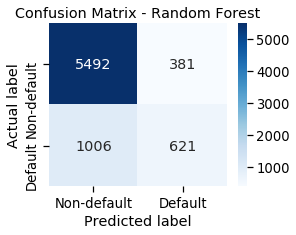

In [120]:
algo_RF = RandomForestClassifier(n_jobs=-1, 
                             random_state=123,
                             criterion='gini',
                             n_estimators=100,
                             verbose=False)

algo_RF.fit(x_train, np.ravel(y_train))
algo_RF.score(x_train,y_train)
predictions_RF = algo_RF.predict(x_test)

accuracy_RF = accuracy_score( y_test, predictions_RF )
print('Accuracy:', accuracy_RF)
print(classification_report(y_test, predictions_RF))

cv_score_RF = cross_val_score(algo_RF, x_train, np.ravel(y_train) , cv = 5)


print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_score_RF),4)))
print ("Standard deviation: {}".format(round(np.std(cv_score_RF),4)))

cm_RF = confusion_matrix( y_test, predictions_RF)
cm_RF
plt.figure(figsize=(4,3))
sns.heatmap(cm_RF,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Random Forest")

roc_auc = roc_auc_score(y_test, predictions_RF)
print('ROC_AUC_RF:' , roc_auc)

#### Random Forest - Normalized Dataset

Accuracy: 0.8141333333333334
              precision    recall  f1-score   support

           0       0.84      0.93      0.89      5873
           1       0.62      0.38      0.47      1627

    accuracy                           0.81      7500
   macro avg       0.73      0.66      0.68      7500
weighted avg       0.80      0.81      0.80      7500

Average 5-Fold CV Score: 0.8166
Standard deviation: 0.0033
Normalized ROC_AUC_RF: 0.6566986253071703


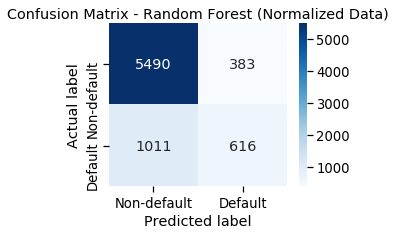

In [121]:
norm_algo_RF = RandomForestClassifier(n_jobs=-1, 
                             random_state=123,
                             criterion='gini',
                             n_estimators=100,
                             verbose=False)

norm_algo_RF.fit(x_tra, np.ravel(y_tra))
norm_algo_RF.score(x_tra,y_tra)
norm_predictions_RF = norm_algo_RF.predict(x_t)

norm_accuracy_RF = accuracy_score( y_t, norm_predictions_RF )
print('Accuracy:', norm_accuracy_RF)
print(classification_report(y_t, norm_predictions_RF))

norm_cv_score_RF = cross_val_score(norm_algo_RF, x_tra, np.ravel(y_tra) , cv = 5)


print("Average 5-Fold CV Score: {}".format(round(np.mean(norm_cv_score_RF),4)))
print ("Standard deviation: {}".format(round(np.std(norm_cv_score_RF),4)))

norm_cm_RF = confusion_matrix( y_t , norm_predictions_RF)
norm_cm_RF
plt.figure(figsize=(4,3))
sns.heatmap(norm_cm_RF,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Random Forest (Normalized Data)")

norm_roc_auc = roc_auc_score(y_t , norm_predictions_RF)
print('Normalized ROC_AUC_RF:' , norm_roc_auc)

#### Random Forest - Important Variables

Accuracy: 0.8102666666666667
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      5873
           1       0.60      0.37      0.46      1627

    accuracy                           0.81      7500
   macro avg       0.72      0.65      0.67      7500
weighted avg       0.79      0.81      0.79      7500

Average 5-Fold CV Score: 0.8075
Standard deviation: 0.0048
ROC_AUC_impVar_RF: 0.6517857339081863


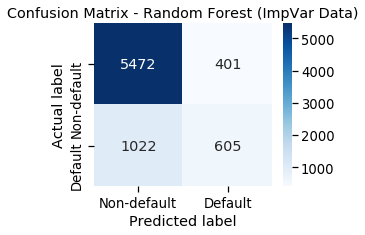

In [123]:
impVar_RF = RandomForestClassifier(n_jobs=-1, 
                             random_state=123,
                             criterion='gini',
                             n_estimators=100,
                             verbose=False)

impVar_RF.fit(x_tra_imp, np.ravel(y_tra_imp))
impVar_RF.score(x_tra_imp , y_tra_imp)
impVar_predictions_RF = impVar_RF.predict(x_t_imp)

impVar_accuracy_RF = accuracy_score( y_t_imp, impVar_predictions_RF )
print('Accuracy:', impVar_accuracy_RF)
print(classification_report(y_t_imp, impVar_predictions_RF))

impVar_cv_score_RF = cross_val_score(impVar_RF, x_tra_imp, np.ravel(y_tra_imp) , cv = 5)


print("Average 5-Fold CV Score: {}".format(round(np.mean(impVar_cv_score_RF),4)))
print ("Standard deviation: {}".format(round(np.std(impVar_cv_score_RF),4)))

impVar_cm_RF = confusion_matrix( y_t_imp , impVar_predictions_RF)
impVar_cm_RF
plt.figure(figsize=(4,3))
sns.heatmap(impVar_cm_RF,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Random Forest (ImpVar Data)")

impVar_roc_auc = roc_auc_score(y_t_imp , impVar_predictions_RF)
print('ROC_AUC_impVar_RF:' , impVar_roc_auc)

#### Random Forest - Dummy Variables

Accuracy: 0.8130666666666667
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      5873
           1       0.61      0.37      0.46      1627

    accuracy                           0.81      7500
   macro avg       0.73      0.65      0.67      7500
weighted avg       0.79      0.81      0.79      7500

Average 5-Fold CV Score: 0.8148
Standard deviation: 0.0059
DUMMY VARIABLES ROC_AUC_RF: 0.6531292191585235


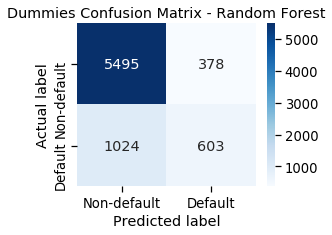

In [124]:
dum_algo_RF = RandomForestClassifier(n_jobs=-1, 
                             random_state=123,
                             criterion='gini',
                             n_estimators=100,
                             verbose=False)

dum_algo_RF.fit(x_tra_dum, np.ravel(y_tra_dum))
dum_algo_RF.score(x_tra_dum , y_tra_dum)
dum_predictions_RF = dum_algo_RF.predict(x_t_dum)

dum_accuracy_RF = accuracy_score( y_t_dum , dum_predictions_RF )
print('Accuracy:', dum_accuracy_RF)
print(classification_report(y_t_dum , dum_predictions_RF))

dum_cv_score_RF = cross_val_score(dum_algo_RF, x_tra_dum , np.ravel(y_tra_dum) , cv = 5)


print("Average 5-Fold CV Score: {}".format(round(np.mean(dum_cv_score_RF),4)))
print ("Standard deviation: {}".format(round(np.std(dum_cv_score_RF),4)))

dum_cm_RF = confusion_matrix( y_t_dum, dum_predictions_RF)
dum_cm_RF
plt.figure(figsize=(4,3))
sns.heatmap(dum_cm_RF,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title("Dummies Confusion Matrix - Random Forest")

dum_roc_auc = roc_auc_score(y_t_dum , dum_predictions_RF)
print('DUMMY VARIABLES ROC_AUC_RF:' , dum_roc_auc)

### MODEL 3 - Support Vector Classifier

#### SVC - Original Dataset

Accuracy: 0.7846666666666666
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      5873
           1       0.66      0.02      0.03      1627

    accuracy                           0.78      7500
   macro avg       0.72      0.51      0.45      7500
weighted avg       0.76      0.78      0.69      7500

Average 5-Fold CV Score: 0.778
Standard deviation: 0.0005
ROC_AUC_SVC: 0.5065760921266165


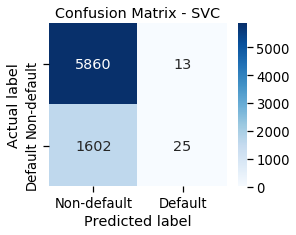

In [128]:
algo_SVC = SVC(C=1.0, 
               kernel='rbf', 
               degree=3, 
               gamma='auto', random_state = 123)

algo_SVC.fit(x_train, np.ravel(y_train))
algo_SVC.score(x_train,y_train)
predictions_SVC = algo_SVC.predict(x_test)

accuracy_SVC = accuracy_score( y_test, predictions_SVC )
print('Accuracy:', accuracy_SVC)
print(classification_report(y_test, predictions_SVC))

cv_score_SVC = cross_val_score(algo_SVC, x_train, np.ravel(y_train) , cv = 5)


print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_score_SVC),4)))
print ("Standard deviation: {}".format(round(np.std(cv_score_SVC),4)))

cm_SVC = confusion_matrix( y_test, predictions_SVC)
cm_SVC
plt.figure(figsize=(4,3))
sns.heatmap(cm_SVC,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - SVC")

roc_auc_SVC = roc_auc_score(y_test, predictions_SVC)
print('ROC_AUC_SVC:' , roc_auc_SVC)

#### SVC - Normalized Dataset

Accuracy: 0.8213333333333334
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      5873
           1       0.67      0.35      0.46      1627

    accuracy                           0.82      7500
   macro avg       0.75      0.65      0.68      7500
weighted avg       0.80      0.82      0.80      7500

Average 5-Fold CV Score: 0.8188
Standard deviation: 0.0041
Normalized ROC_AUC_SVC: 0.6510757143809487


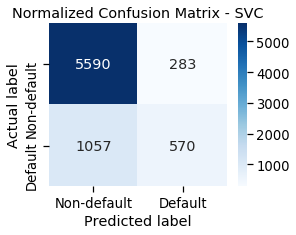

In [127]:
norm_algo_SVC = SVC(C=1.0, 
               kernel='rbf', 
               degree=3, 
               gamma='auto', random_state = 123)

norm_algo_SVC.fit(x_tra, np.ravel(y_tra))
norm_algo_SVC.score(x_tra,y_tra)
norm_predictions_SVC = norm_algo_SVC.predict(x_t)

norm_accuracy_SVC = accuracy_score( y_t, norm_predictions_SVC )
print('Accuracy:', norm_accuracy_SVC)
print(classification_report(y_t , norm_predictions_SVC))

norm_cv_score_SVC = cross_val_score(norm_algo_SVC, x_tra, np.ravel(y_tra) , cv = 5)


print("Average 5-Fold CV Score: {}".format(round(np.mean(norm_cv_score_SVC),4)))
print ("Standard deviation: {}".format(round(np.std(norm_cv_score_SVC),4)))

norm_cm_SVC = confusion_matrix( y_t , norm_predictions_SVC)
norm_cm_SVC
plt.figure(figsize=(4,3))
sns.heatmap(norm_cm_SVC,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title("Normalized Confusion Matrix - SVC")

norm_roc_auc_SVC = roc_auc_score(y_t , norm_predictions_SVC)
print('Normalized ROC_AUC_SVC:' , norm_roc_auc_SVC)

#### SVC - Important Variables Dataset

Accuracy: 0.8224
              precision    recall  f1-score   support

           0       0.84      0.96      0.89      5873
           1       0.70      0.32      0.44      1627

    accuracy                           0.82      7500
   macro avg       0.77      0.64      0.67      7500
weighted avg       0.81      0.82      0.80      7500

Average 5-Fold CV Score: 0.8179
Standard deviation: 0.004
Important Variables ROC_AUC_SVC: 0.6413143979443603


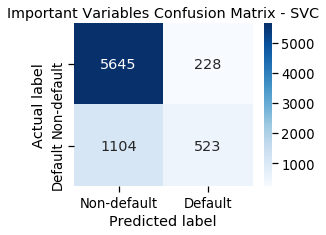

In [126]:
impVar_SVC = SVC(C=1.0, 
               kernel='rbf', 
               degree=3, 
               gamma='auto', random_state = 123)

impVar_SVC.fit(x_tra_imp, np.ravel(y_tra_imp))
impVar_SVC.score(x_tra_imp , y_tra_imp)
impVar_predictions_SVC = impVar_SVC.predict(x_t_imp)

impVar_accuracy_SVC = accuracy_score( y_t_imp , impVar_predictions_SVC )
print('Accuracy:', impVar_accuracy_SVC)
print(classification_report(y_t_imp , impVar_predictions_SVC))

impVar_cv_score_SVC = cross_val_score(impVar_SVC, x_tra_imp , np.ravel(y_tra_imp) , cv = 5)


print("Average 5-Fold CV Score: {}".format(round(np.mean(impVar_cv_score_SVC),4)))
print ("Standard deviation: {}".format(round(np.std(impVar_cv_score_SVC),4)))

impVar_cm_SVC = confusion_matrix( y_t_imp , impVar_predictions_SVC)
impVar_cm_SVC
plt.figure(figsize=(4,3))
sns.heatmap(impVar_cm_SVC,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title("Important Variables Confusion Matrix - SVC")

impVar_roc_auc_SVC = roc_auc_score(y_t_imp , impVar_predictions_SVC)
print('Important Variables ROC_AUC_SVC:' , impVar_roc_auc_SVC)

#### SVC - Dummy Variables Dataset

Accuracy: 0.7844
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      5873
           1       0.62      0.02      0.03      1627

    accuracy                           0.78      7500
   macro avg       0.70      0.51      0.45      7500
weighted avg       0.75      0.78      0.69      7500

Average 5-Fold CV Score: 0.7783
Standard deviation: 0.001
DUMMY VARIABLES ROC_AUC_SVC: 0.5066280001059089


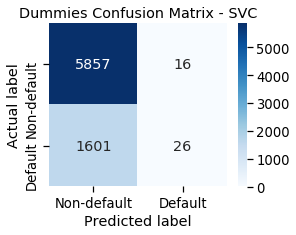

In [125]:
dum_algo_SVC = SVC(C=1.0, 
               kernel='rbf', 
               degree=3, 
               gamma='auto', random_state = 123)

dum_algo_SVC.fit(x_tra_dum, np.ravel(y_tra_dum))
dum_algo_SVC.score(x_tra_dum , y_tra_dum)
dum_predictions_SVC = dum_algo_SVC.predict(x_t_dum)

dum_accuracy_SVC = accuracy_score( y_t_dum , dum_predictions_SVC)
print('Accuracy:', dum_accuracy_SVC)
print(classification_report(y_t_dum , dum_predictions_SVC))

dum_cv_score_SVC = cross_val_score(dum_algo_SVC, x_tra_dum , np.ravel(y_tra_dum) , cv = 5)


print("Average 5-Fold CV Score: {}".format(round(np.mean(dum_cv_score_SVC),4)))
print ("Standard deviation: {}".format(round(np.std(dum_cv_score_SVC),4)))

dum_cm_SVC = confusion_matrix( y_t_dum, dum_predictions_SVC)
dum_cm_SVC
plt.figure(figsize=(4,3))
sns.heatmap(dum_cm_SVC,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title("Dummies Confusion Matrix - SVC")

dum_roc_auc = roc_auc_score(y_t_dum , dum_predictions_SVC)
print('DUMMY VARIABLES ROC_AUC_SVC:' , dum_roc_auc)

## Summary of all models

In [130]:
# Original Dataset
data_rows = [('Logistic Regression', 'Original', 0.78, 0.72, 0.78, 0.69),
              ('Random Forest', 'Original', 0.82, 0.80, 0.82, 0.80),
             ('SVC', 'Original', 0.78, 0.76, 0.78, 0.69)]

t_original = Table(rows=data_rows, names=('Model', 'Data', 'Accuracy', 'Precision', 'Recall', 'F1'))
print(t_original)

       Model          Data   Accuracy Precision Recall  F1 
------------------- -------- -------- --------- ------ ----
Logistic Regression Original     0.78      0.72   0.78 0.69
      Random Forest Original     0.82       0.8   0.82  0.8
                SVC Original     0.78      0.76   0.78 0.69


In [131]:
# Normalized Dataset
data_rows = [('Logistic Regression', 'Normalized', 0.81, 0.79, 0.81, 0.77),
              ('Random Forest', 'Normalized', 0.81, 0.80, 0.81, 0.80),
             ('SVC', 'Normalized', 0.82, 0.80, 0.82, 0.80)]

t_normalized = Table(rows=data_rows, names=('Model', 'Data', 'Accuracy', 'Precision', 'Recall', 'F1'))
print(t_normalized)

       Model           Data    Accuracy Precision Recall  F1 
------------------- ---------- -------- --------- ------ ----
Logistic Regression Normalized     0.81      0.79   0.81 0.77
      Random Forest Normalized     0.81       0.8   0.81  0.8
                SVC Normalized     0.82       0.8   0.82  0.8


In [132]:
# Important Variables Dataset
data_rows = [('Logistic Regression', 'Imp_Variables', 0.81, 0.79, 0.81, 0.77),
              ('Random Forest', 'Imp_Variables', 0.81, 0.79, 0.81, 0.79),
             ('SVC', 'Imp_Variables', 0.82, 0.81, 0.82, 0.80)]

t_Imp_Variables = Table(rows=data_rows, names=('Model', 'Data', 'Accuracy', 'Precision', 'Recall', 'F1'))
print(t_Imp_Variables)

       Model             Data     Accuracy Precision Recall  F1 
------------------- ------------- -------- --------- ------ ----
Logistic Regression Imp_Variables     0.81      0.79   0.81 0.77
      Random Forest Imp_Variables     0.81      0.79   0.81 0.79
                SVC Imp_Variables     0.82      0.81   0.82  0.8


In [133]:
# Dummy Variables Dataset
data_rows = [('Logistic Regression', 'Dummy_Variables', 0.78, 0.76, 0.78, 0.69),
              ('Random Forest', 'Dummy_Variables', 0.81, 0.79, 0.81, 0.79),
             ('SVC', 'Dummy_Variables', 0.78, 0.75, 0.78, 0.69)]

t_Dummy_Variables = Table(rows=data_rows, names=('Model', 'Data', 'Accuracy', 'Precision', 'Recall', 'F1'))
print(t_Dummy_Variables)

       Model              Data      Accuracy Precision Recall  F1 
------------------- --------------- -------- --------- ------ ----
Logistic Regression Dummy_Variables     0.78      0.76   0.78 0.69
      Random Forest Dummy_Variables     0.81      0.79   0.81 0.79
                SVC Dummy_Variables     0.78      0.75   0.78 0.69
